In [1]:
# Las restricciones que se definen por igualdades o desigualdades que incluyen más de una variable son más complicadas
# de tratar. Sin embargo, existen técnicas generales que también podemos utilizar para este tipo de problemas.
# Volviendo al ejemplo anterior, cambiemos la restricción por una más compleja,
# como ser: g(x)=x1−1.75−(x0−0.75)4≥0. Para resolver este problema scipy.optimize
# nos ofrece un método llamado programación secuencial por mínimos cuadrados, o SLSQP por su abreviatura en inglés.

In [2]:
# IMPORTANDO MÓDULOS NECESARIOS y TÍPICOS IO
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import cvxopt
from cvxopt import matrix
import pulp
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ

In [3]:
# defino una funcion de ayuda para subregion en el gráfico
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)
# función a minimizar
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2

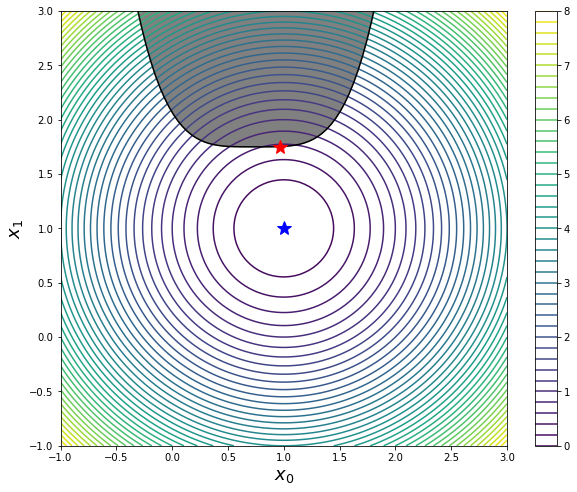

In [4]:
# Ejemplo scipy SLSQP
# funcion de restriccion
def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4
# definimos el diccionario con la restricción
restriccion = dict(type='ineq', fun=g)
# resolvemos
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP',
                               constraints=restriccion).x

# graficamos
ig, ax = plt.subplots(figsize=(10, 8))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)
plt.show()